In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse)
clinical_df=pd.DataFrame(clinical)

data = pd.merge (clinical_df, mouse_df, on = ['Mouse ID'], how = 'left' )

# Display the data table for preview
data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Tumor Response to Treatment

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Tumor_vol = data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
mean = Tumor_vol.mean()

# Convert to DataFrame
Tumor_df = pd.DataFrame(mean).reset_index()

# Preview DataFrame
Tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sd = Tumor_vol.sem()

# Convert to DataFrame
sd_df=pd.DataFrame(sd).reset_index()
sd_df.columns = ['Drug', 'Timepoint', 'TumerVol_sd'] 

# Preview DataFrame
sd_df.head()

,Drug,Timepoint,TumerVol_sd
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot = Tumor_df.pivot(index ='Timepoint', values="Tumor Volume (mm3)", columns="Drug")

# Preview that Reformatting worked
pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
pivot_sd = sd_df.pivot(index ='Timepoint', values="TumerVol_sd", columns="Drug")
pivot_sd.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


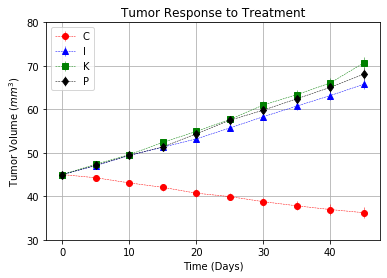

In [6]:
# Generate the Plot (with Error Bars)

drugs = [pivot['Capomulin'], pivot['Infubinol'],pivot['Ketapril'], pivot['Placebo']]
fmts = ["o", "^", "s", "d"]
colors = ["r", "b", "g", "k"]
errs = [pivot_sd['Capomulin'], pivot_sd['Infubinol'],pivot_sd['Ketapril'], pivot_sd['Placebo']]

for drug, fmt, color,err in zip(drugs,fmts,colors,errs):
    drug_plt = plt.errorbar(pivot.index, drug, fmt=fmt, color=color,linewidth=.5, linestyle="--",yerr=err)

plt.title("Tumor Response to Treatment")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume " + "$(mm^3)$")

plt.legend('CIKP',loc="best")

plt.xlim(-2.5, 47.5)
plt.ylim(30, 80)

plt.grid()

# Save figure
plt.savefig("../Pymaceuticals/treatment.png")

# Save the Figure
plt.show()


In [7]:
# Metastatic Response to Treatment

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

MS = data.groupby(['Drug','Timepoint'])['Metastatic Sites']
Mean_MS = MS.mean()

# Convert to DataFrame

Mean_MS_df= pd.DataFrame(Mean_MS)

# Preview DataFrame
Mean_MS_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sd_MS = MS.sem()

# Convert to DataFrame
sd_MS_df = pd.DataFrame(sd_MS)
sd_MS_df.columns = ['sd_MS']

# Preview DataFrame
sd_MS_df.head()

sd_MS
Drug      Timepoint          
Capomulin 0          0.000000
          5          0.074833
          10         0.125433
          15         0.132048
          20         0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
Mean_MS_df = Mean_MS_df.reset_index()
pivot_MS = Mean_MS_df.pivot(index="Timepoint", values="Metastatic Sites", columns="Drug")

# # Preview that Reformatting worked
pivot_MS.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
sd_MS_df = sd_MS_df.reset_index()
pivot_sd_MS = sd_MS_df.pivot(index="Timepoint", values="sd_MS", columns="Drug")

pivot_sd_MS.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


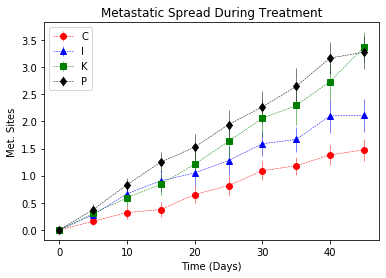

In [11]:
# Generate the Plot (with Error Bars)
drugs_s = [pivot_MS['Capomulin'], pivot_MS['Infubinol'],pivot_MS['Ketapril'], pivot_MS['Placebo']]
errs_s = [pivot_sd_MS['Capomulin'], pivot_sd_MS['Infubinol'],pivot_sd_MS['Ketapril'], pivot_sd_MS['Placebo']]

for drug_s, fmt, color,err_s in zip(drugs_s,fmts,colors,errs_s):
    drug_s_plt = plt.errorbar(pivot_MS.index, drug_s, fmt=fmt, color=color,linewidth=.5, linestyle="--",yerr=err_s)

plt.title("Metastatic Spread During Treatment")

plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")

plt.legend('CIKP',loc="best")

# Save figure
plt.savefig("../Pymaceuticals/Met.png")

# Show the Figure
plt.show()

In [12]:
# Survival Rates

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice = data.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
Mice_df =pd.DataFrame(Mice).reset_index()

# Preview DataFrame
Mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice = Mice_df.pivot(index ='Timepoint', values="Mouse ID", columns="Drug")

# Preview the Data Frame
pivot_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
percentage = pivot_mice.div( pivot_mice.iloc[0,:], axis=1 )
percentage

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.000000,1.00
5,1.00,0.84,1.00,0.92,0.92,0.96,0.961538,1.00,0.961538,0.96
10,1.00,0.80,0.84,0.88,0.84,0.96,0.884615,0.96,0.884615,0.88
15,0.96,0.76,0.84,0.76,0.84,0.80,0.653846,0.96,0.884615,0.84
20,0.92,0.72,0.80,0.76,0.80,0.76,0.653846,0.92,0.807692,0.68
25,0.88,0.72,0.72,0.76,0.72,0.68,0.538462,0.92,0.730769,0.64
30,0.88,0.64,0.68,0.72,0.60,0.60,0.500000,0.92,0.692308,0.60
35,0.88,0.56,0.48,0.68,0.60,0.56,0.384615,0.84,0.615385,0.56
40,0.84,0.56,0.40,0.60,0.60,0.48,0.346154,0.80,0.461538,0.56


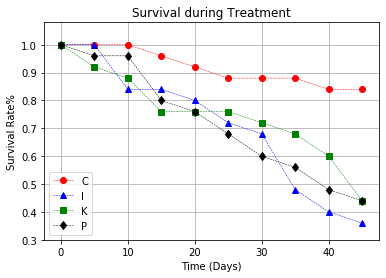

In [15]:
# Generate the Plot (Accounting for percentages)
drugs_p = [percentage['Capomulin'], percentage['Infubinol'],percentage['Ketapril'], percentage['Placebo']]
for drug_p, fmt, color in zip(drugs_p,fmts,colors):
    percentage_plt, = plt.plot(percentage.index, drug_p, color=color,marker = fmt, linewidth=.5, linestyle="--")

plt.title("Survival during Treatment")

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate%")

plt.legend('CIKP',loc="best")

plt.xlim(-2.5, 47.5)
plt.ylim(.3, 1.08)

plt.grid()

# Save figure
plt.savefig("../Pymaceuticals/survival.png")

# Save the Figure
plt.show()

In [16]:
# Summary Bar Graph

# Calculate the percent changes for each drug
change = pivot.iloc[len(pivot)-1,:]/pivot.iloc[0,:]-1

# Display the data to confirm
change

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

In [17]:
change.reset_index()

,Drug,0
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Ketapril,0.570288
4,Naftisol,0.539233
5,Placebo,0.512980
6,Propriva,0.472412
7,Ramicane,-0.223209
8,Stelasyn,0.520851
9,Zoniferol,0.465798


In [18]:
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
drug_list = change.loc[drugs]
drug_list

Drug
Capomulin   -0.194753
Infubinol    0.461235
Ketapril     0.570288
Placebo      0.512980
dtype: float64

In [19]:
drug_list_df = drug_list.reset_index()
scores = list(drug_list_df [0])
scores

[-0.19475302667894168,
 0.4612347172785185,
 0.5702879468660607,
 0.5129796048315152]

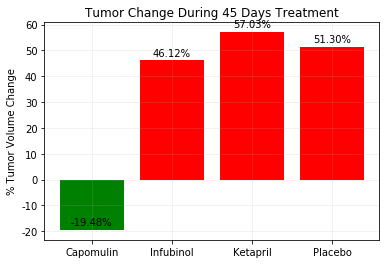

In [20]:
scores_df = pd.DataFrame(scores)   

x_axis = np.arange(len(scores))
fig = plt.bar(x_axis,scores,color= ['r' if score > 0 else 'g' for score in scores_df[0]])

# Orient widths. Add labels, tick marks, etc. 

plt.xticks(x_axis, ['Capomulin','Infubinol','Ketapril','Placebo'])
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change During 45 Days Treatment')
plt.grid(alpha=0.2)

my_y_ticks = np.arange(-30, 70, 10)
plt.gca().set_yticklabels(my_y_ticks)

# Use functions to label the percentages of changes

for x,y in zip(x_axis,scores_df[0]): 
    plt.text(x, y +.01,"{:.2%}".format(y), ha='center', va= 'bottom',fontsize=10)

    
# Call functions to implement the function calls

# Save the Figure
plt.savefig("../Pymaceuticals/percentage.png")
